# 안녕하세요:)

## AIVLE 1차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [1]:
import pandas as pd
import scipy.stats as spst
import matplotlib.pyplot as plt

In [2]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [3]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [4]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [5]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
df_seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040


In [6]:
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=',', encoding='UTF-8')
df_seoul_moving.rename(columns={'도착 시군구':'자치구'}, inplace=True)
df_seoul_moving.head()

,자치구,평균 이동시간,평균 이동인구,총 이동시간,총 이동인구
0,강남구,23.418794,104.459927,6543820,2.918882e+07
1,강동구,25.931701,73.493575,5082380,1.440408e+07
2,강북구,24.355289,42.258539,4458260,7.735468e+06
3,강서구,25.520396,65.193949,5486630,1.401605e+07
4,관악구,23.480725,53.060305,5150450,1.163867e+07


In [7]:
# df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8')
# df_seoul_business.head()

In [8]:
# df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')
# df_seoul_people.head()

In [9]:
#df = pd.merge(standard,df_seoul_bus_station,how='inner', on='자치구')

In [10]:
df = pd.merge(df_seoul_bus_station, df_seoul_moving, how='inner', on='자치구')
df.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동시간,평균 이동인구,총 이동시간,총 이동인구
0,강남구,499,91,8030483,7569213,128.767927,121.371512,23.418794,104.459927,6543820,2.918882e+07
1,강동구,369,21,2890053,2830506,99.161194,97.118065,25.931701,73.493575,5082380,1.440408e+07
2,강북구,413,67,4825181,4671783,133.020373,128.791504,24.355289,42.258539,4458260,7.735468e+06
3,강서구,566,49,4681083,4652828,88.119480,87.587591,25.520396,65.193949,5486630,1.401605e+07
4,관악구,466,86,7655819,7792476,154.753674,157.516040,23.480725,53.060305,5150450,1.163867e+07


In [11]:
df.corr()

,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동시간,평균 이동인구,총 이동시간,총 이동인구
정류장수,1.000000,0.258798,0.566681,0.578479,-0.135318,-0.099146,0.199466,0.387143,0.359348,0.370620
노선수,0.258798,1.000000,0.665488,0.652642,0.493541,0.470440,-0.693565,-0.013868,0.360500,0.188164
승차총승객수,0.566681,0.665488,1.000000,0.996610,0.538720,0.547384,-0.146534,0.472630,0.572455,0.568739
하차총승객수,0.578479,0.652642,0.996610,1.000000,0.534826,0.555137,-0.135064,0.460851,0.564608,0.550686
승차평균승객수,-0.135318,0.493541,0.538720,0.534826,1.000000,0.989288,-0.410118,-0.081090,0.124998,0.051665
하차평균승객수,-0.099146,0.470440,0.547384,0.555137,0.989288,1.000000,-0.387490,-0.076703,0.133859,0.045808
평균 이동시간,0.199466,-0.693565,-0.146534,-0.135064,-0.410118,-0.387490,1.000000,0.360708,-0.125621,0.120328
평균 이동인구,0.387143,-0.013868,0.472630,0.460851,-0.081090,-0.076703,0.360708,1.000000,0.812468,0.963719
총 이동시간,0.359348,0.360500,0.572455,0.564608,0.124998,0.133859,-0.125621,0.812468,1.000000,0.908125
총 이동인구,0.370620,0.188164,0.568739,0.550686,0.051665,0.045808,0.120328,0.963719,0.908125,1.000000


## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

    ? 정해진게 없나요? - 네 라벨을 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다


    ? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다


    ? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

## 가설을 설정해 봅시다 (조당 최소 3개) 
- 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1 승차총승객수와 하차총승객수는 노선수와 관련이 있을 것이다.

* 가설 2 승하차총합수와 정류장 수는 관련이 있을 것이다.

* 가설 3 정류장 수 대비 노선수가 많으면 평균이동시간이 줄어들 것이다

* 가설 4 승하차총승객수 대비 평균 이동시간이 노선 수와 상관 있을 것이다.

* 기타 가설
  - 상권, 거리두기 등의 요인에 따른 이동상황
  - 시간상 확인은 못했음

## 2.단변량 분석 
(조별로 3개 정도의 변수만 진행해주세요)

+ 변수의 의미  

+ 숫자? 범주?

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용 정리  

+ 추가 분석해볼 사항 도출

In [ ]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

# 로컬에서 사용하신다면 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# AIDU에서 사용하신다면 나눔 고딕

# plt.rc('font', family='nanum')
# sns.set(font="NanumGothicCoding",#"NanumGothicCoding", 
#         rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
#         style='darkgrid')

# scipy
import scipy.stats as spst

### 1) 승차총승객수


기초통계량
count        25.00
mean    4912037.28
std     1421263.42
min     2749448.00
25%     3792541.00
50%     4942197.00
75%     5641742.00
max     8030483.00
Name: 승차총승객수, dtype: float64
----------------------------------------------------------------------------------------------------


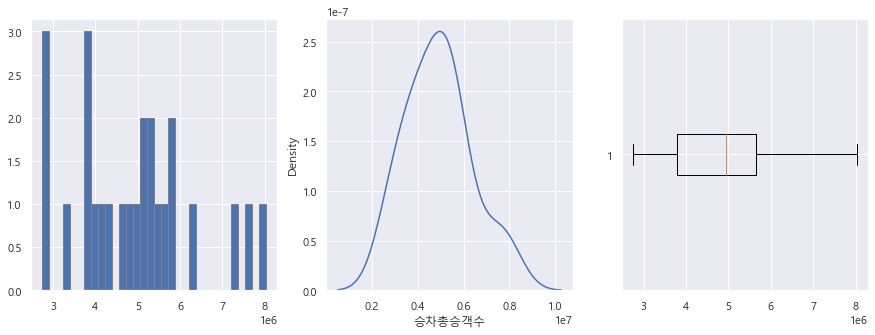

In [68]:
# 기초통계량, 분포 시각화
var = '승차총승객수'
temp = df.loc[df[var].notnull(), var]

# 기초 통계량
print('기초통계량')
print(temp.describe())
print('-'*100)

plt.figure(figsize=(15,5))
# 히스토그램
plt.subplot(1,3,1)
plt.hist(temp, bins=32, edgecolor='grey')

# density plot
plt.subplot(1,3,2)
sns.kdeplot(temp)

# boxplot
plt.subplot(1,3,3)
plt.boxplot(temp, vert=False)

plt.show()


### 2) 하차총승객수

기초통계량
count        25.00
mean    4800700.60
std     1400537.52
min     2746738.00
25%     3740923.00
50%     4730992.00
75%     5603488.00
max     7792476.00
Name: 하차총승객수, dtype: float64
----------------------------------------------------------------------------------------------------


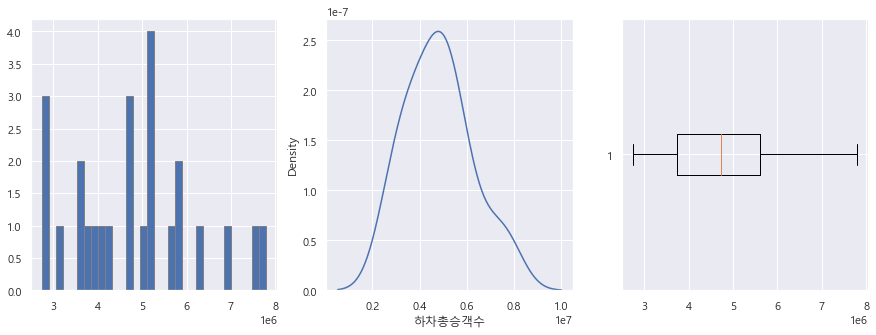

In [69]:
# 기초통계량, 분포 시각화
var = '하차총승객수'
temp = df.loc[df[var].notnull(), var]

# 기초 통계량
print('기초통계량')
print(temp.describe())
print('-'*100)

plt.figure(figsize=(15,5))
# 히스토그램
plt.subplot(1,3,1)
plt.hist(temp, bins=32, edgecolor='grey')


# density plot
plt.subplot(1,3,2)
sns.kdeplot(temp)


# boxplot
plt.subplot(1,3,3)
plt.boxplot(temp, vert=False)

plt.show()


### 3) 노선수

기초통계량
count    25.00
mean     72.92
std      23.81
min      21.00
25%      56.00
50%      71.00
75%      94.00
max     107.00
Name: 노선수, dtype: float64
----------------------------------------------------------------------------------------------------


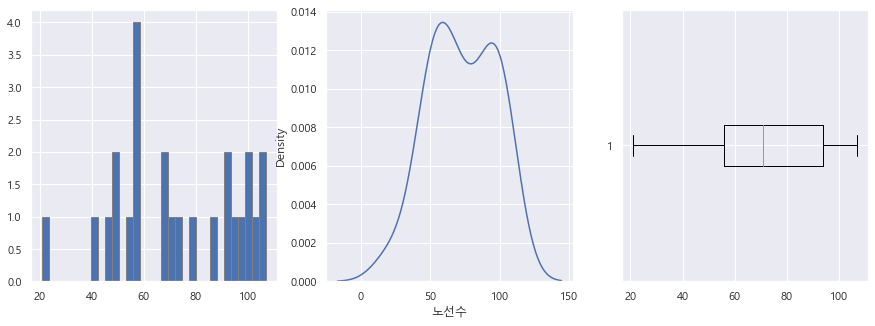

In [70]:
# 기초통계량, 분포 시각화
var = '노선수'
temp = df.loc[df[var].notnull(), var]

# 기초 통계량
print('기초통계량')
print(temp.describe())
print('-'*100)

plt.figure(figsize=(15,5))
# 히스토그램
plt.subplot(1,3,1)
plt.hist(temp, bins=32, edgecolor='grey')


# density plot
plt.subplot(1,3,2)
sns.kdeplot(temp)


# boxplot
plt.subplot(1,3,3)
plt.boxplot(temp, vert=False)

plt.show()


## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [22]:
# 한글폰트
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

### 1) 가설 1 승차총승객수와 하차총승객수는 노선수와 관련이 있을 것이다.

In [23]:
target = '노선수'
feature = '승차총승객수'

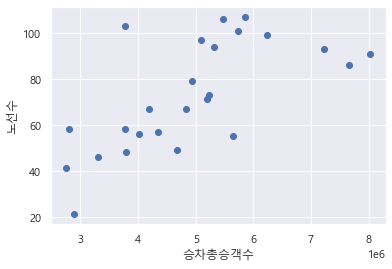

In [24]:
# 산점도 시각화
plt.scatter(feature, target, data = df)
plt.xlabel('승차총승객수')
plt.ylabel('노선수')
plt.show()

- 직선의 형태는 아니지만 승차총승객수가 많아질수록 노선수도 많아지는 양상

In [25]:
# 상관계수 분석
spst.pearsonr(df[feature], df[target])

(0.6654877832095705, 0.0002830862285771965)

- (0.6654877832095705, 0.0002830862285771965)
- 강한 상관계수, 0.05보다 작은 p-value
- 하차총승객수도 거의 동일하게 나옴

#### 솔루션
- - 승차총승객수라 많은 지역은 많은 노선수를 갖고 있는 것으로 미루어 보아
- 승차총승객수 대비 노선수가 가장 작은 구에 필요하다고 생각된다.

==> 강동구, 송파구

In [12]:
# '승차승객대비노선수'와 '하차승객대비노선수' 칼럼을 새로 만들어주어서 승하차 승객수 대비 노선수가 가장 적은 구를 찾아준디.

In [13]:
pd.options.display.float_format = '{:.2f}'.format
df['승차승객대비노선수'] = df['노선수'] / df['승차총승객수'] * 1000000
df.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동시간,평균 이동인구,총 이동시간,총 이동인구,승차승객대비노선수
0,강남구,499,91,8030483,7569213,128.77,121.37,23.42,104.46,6543820,29188819.52,11.33
1,강동구,369,21,2890053,2830506,99.16,97.12,25.93,73.49,5082380,14404079.28,7.27
2,강북구,413,67,4825181,4671783,133.02,128.79,24.36,42.26,4458260,7735467.90,13.89
3,강서구,566,49,4681083,4652828,88.12,87.59,25.52,65.19,5486630,14016047.01,10.47
4,관악구,466,86,7655819,7792476,154.75,157.52,23.48,53.06,5150450,11638671.68,11.23


In [14]:
pd.options.display.float_format = '{:.2f}'.format
df['하차승객대비노선수'] = df['노선수'] / df['하차총승객수'] * 1000000
df.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동시간,평균 이동인구,총 이동시간,총 이동인구,승차승객대비노선수,하차승객대비노선수
0,강남구,499,91,8030483,7569213,128.77,121.37,23.42,104.46,6543820,29188819.52,11.33,12.02
1,강동구,369,21,2890053,2830506,99.16,97.12,25.93,73.49,5082380,14404079.28,7.27,7.42
2,강북구,413,67,4825181,4671783,133.02,128.79,24.36,42.26,4458260,7735467.90,13.89,14.34
3,강서구,566,49,4681083,4652828,88.12,87.59,25.52,65.19,5486630,14016047.01,10.47,10.53
4,관악구,466,86,7655819,7792476,154.75,157.52,23.48,53.06,5150450,11638671.68,11.23,11.04


In [15]:
df.sort_values(by=['승차승객대비노선수']).head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동시간,평균 이동인구,총 이동시간,총 이동인구,승차승객대비노선수,하차승객대비노선수
1,강동구,369,21,2890053,2830506,99.16,97.12,25.93,73.49,5082380,14404079.28,7.27,7.42
17,송파구,415,55,5641742,5603488,114.27,113.50,25.74,94.97,6234190,23004946.79,9.75,9.82
3,강서구,566,49,4681083,4652828,88.12,87.59,25.52,65.19,5486630,14016047.01,10.47,10.53
4,관악구,466,86,7655819,7792476,154.75,157.52,23.48,53.06,5150450,11638671.68,11.23,11.04
0,강남구,499,91,8030483,7569213,128.77,121.37,23.42,104.46,6543820,29188819.52,11.33,12.02


### 2) 가설 2 승하차총합수와 정류장 수는 관련이 있을 것이다.

In [31]:
# 칼럼 생성
df['승하차총합'] = df['승차총승객수'] + df['하차총승객수']
df.head(2)

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동시간,평균 이동인구,총 이동시간,총 이동인구,승차승객대비노선수,하차승객대비노선수,승하차총합
0,강남구,499,91,8030483,7569213,128.77,121.37,23.42,104.46,6543820,29188819.52,11.33,12.02,15599696
1,강동구,369,21,2890053,2830506,99.16,97.12,25.93,73.49,5082380,14404079.28,7.27,7.42,5720559


In [32]:
# 상관계수 확인
spst.pearsonr(df['승하차총합'], df['정류장수'])

(0.5730226697878741, 0.002752973475733159)

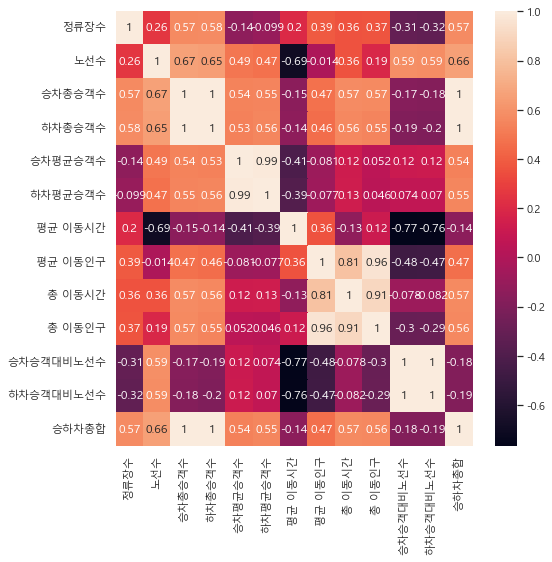

In [34]:
# 히트맵 시각화
plt.figure(figsize = (8, 8))
sns.heatmap(df.corr(), annot = True)
plt.show()

#### 솔루션
수요 대비 공급이 적은 곳에 추가 노선 또는 정류장이 필요할 것이다.

### 3) 가설 3 정류장 수 대비 노선수가 많으면 평균이동시간이 줄어들 것이다

In [16]:
tmp=df['노선수']/df['정류장수']
spst.pearsonr(df['평균 이동시간'], tmp) #pvalue확인

(-0.6359705297245506, 0.0006333143239016103)

In [51]:
# 상관계수 확인
tmp2 = pd.DataFrame({
    "정류장수대비노선수":tmp,
    "평균이동시간":df['평균 이동시간']
})
tmp2.corr() #corr확인

,정류장수대비노선수,평균이동시간
정류장수대비노선수,1.00,-0.64
평균이동시간,-0.64,1.00


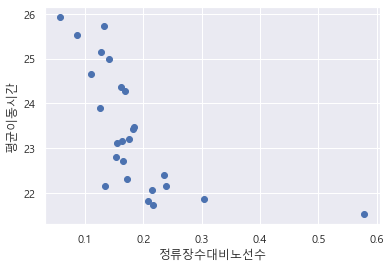

In [41]:
# 시각화
plt.scatter(tmp, df['평균 이동시간'])
plt.xlabel('정류장수대비노선수')
plt.ylabel('평균이동시간')
plt.show()

#### 솔루션
- 사람이 많은 곳에 노선

수요 대비 공급이 적은 곳에 추가 노선 또는 정류장이 필요할 것이다.

### 4) 가설 4 승하차총승객수 대비 평균 이동시간이 노선 수와 상관 있을 것이다.

In [ ]:
# df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
# df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')
# df = pd.merge(standard,df_seoul_bus_station,how='inner', on='자치구')
# df = pd.merge(df,df_seoul_moving,how='inner', on='도착 시군구 코드')

In [ ]:
#analysis_li = ['승차총승객수','하차총승객수','승차평균승객수','하차평균승객수', '평균 이동 시간(분)','이동인구(합)', '총 이동 시간', '총 이동인구']

In [43]:
test = df.copy()
test['승차총승객수<->평균이동시간'] = df['승차총승객수'] // df['평균 이동시간']
test['하차총승객수<->평균이동시간'] = df['하차총승객수'] // df['평균 이동시간']
test.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동시간,평균 이동인구,총 이동시간,총 이동인구,승차승객대비노선수,하차승객대비노선수,승하차총합,승차총승객수<->평균이동시간,하차총승객수<->평균이동시간
0,강남구,499,91,8030483,7569213,128.77,121.37,23.42,104.46,6543820,29188819.52,11.33,12.02,15599696,342907.00,323211.00
1,강동구,369,21,2890053,2830506,99.16,97.12,25.93,73.49,5082380,14404079.28,7.27,7.42,5720559,111448.00,109152.00
2,강북구,413,67,4825181,4671783,133.02,128.79,24.36,42.26,4458260,7735467.90,13.89,14.34,9496964,198116.00,191818.00
3,강서구,566,49,4681083,4652828,88.12,87.59,25.52,65.19,5486630,14016047.01,10.47,10.53,9333911,183425.00,182318.00
4,관악구,466,86,7655819,7792476,154.75,157.52,23.48,53.06,5150450,11638671.68,11.23,11.04,15448295,326046.00,331866.00


In [50]:
# 상관계수 확인
temp = spst.pearsonr(test['노선수'], test['승차총승객수<->평균이동시간'])
print('노선 수 -> 승차총승객수<->평균이동시간의 상관 계수: {}, pvalue: {}'.format(temp[0], temp[1]))
print('-----------------------------')
temp = spst.pearsonr(test['노선수'], test['하차총승객수<->평균이동시간'])
print('노선 수 -> 하차총승객수<->평균이동시간의 상관 계수: {}, pvalue: {}'.format(temp[0], temp[1]))
print('-----------------------------')

노선 수 -> 승차총승객수<->평균이동시간의 상관 계수: 0.7615827109075217, pvalue: 9.774016432776943e-06
-----------------------------
노선 수 -> 하차총승객수<->평균이동시간의 상관 계수: 0.7499345331162306, pvalue: 1.5886827219705295e-05
-----------------------------


#### 정렬해서 확인

In [48]:
total_on = test.sort_values(by='승차총승객수<->평균이동시간', ascending=False)
total_on

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동시간,평균 이동인구,총 이동시간,총 이동인구,승차승객대비노선수,하차승객대비노선수,승하차총합,승차총승객수<->평균이동시간,하차총승객수<->평균이동시간
0,강남구,499,91,8030483,7569213,128.77,121.37,23.42,104.46,6543820,29188819.52,11.33,12.02,15599696,342907.00,323211.00
4,관악구,466,86,7655819,7792476,154.75,157.52,23.48,53.06,5150450,11638671.68,11.23,11.04,15448295,326046.00,331866.00
14,서초구,600,93,7221330,6977950,126.69,122.42,23.12,72.54,5944440,18651195.64,12.88,13.33,14199280,312345.00,301818.00
16,성북구,602,99,6236424,6231238,123.25,123.15,22.72,48.97,5232500,11278789.10,15.87,15.89,12467662,274534.00,274306.00
19,영등포구,465,101,5739875,5783211,120.34,121.25,21.75,61.76,5525180,15693027.00,17.60,17.46,11523086,263956.00,265948.00
13,서대문구,456,107,5863499,5796960,109.91,108.67,22.41,46.17,4952990,10203725.49,18.25,18.46,11660459,261631.00,258662.00
22,종로구,349,106,5468935,5205394,131.89,125.53,21.87,46.07,5471640,11528599.19,19.38,20.36,10674329,250091.00,238039.00
11,동작구,438,94,5314274,5112276,124.30,119.57,22.06,45.15,4944030,10119602.87,17.69,18.39,10426550,240911.00,231754.00
10,동대문구,306,73,5240565,5115379,131.84,128.69,22.15,41.07,5132710,9517475.46,13.93,14.27,10355944,236602.00,230950.00
12,마포구,562,97,5088461,4957596,103.91,101.24,22.31,60.55,5557360,15083231.22,19.06,19.57,10046057,228100.00,222234.00


In [49]:
total_out = test.sort_values(by='하차총승객수<->평균이동시간', ascending=False)
total_out

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동시간,평균 이동인구,총 이동시간,총 이동인구,승차승객대비노선수,하차승객대비노선수,승하차총합,승차총승객수<->평균이동시간,하차총승객수<->평균이동시간
4,관악구,466,86,7655819,7792476,154.75,157.52,23.48,53.06,5150450,11638671.68,11.23,11.04,15448295,326046.00,331866.00
0,강남구,499,91,8030483,7569213,128.77,121.37,23.42,104.46,6543820,29188819.52,11.33,12.02,15599696,342907.00,323211.00
14,서초구,600,93,7221330,6977950,126.69,122.42,23.12,72.54,5944440,18651195.64,12.88,13.33,14199280,312345.00,301818.00
16,성북구,602,99,6236424,6231238,123.25,123.15,22.72,48.97,5232500,11278789.10,15.87,15.89,12467662,274534.00,274306.00
19,영등포구,465,101,5739875,5783211,120.34,121.25,21.75,61.76,5525180,15693027.00,17.60,17.46,11523086,263956.00,265948.00
13,서대문구,456,107,5863499,5796960,109.91,108.67,22.41,46.17,4952990,10203725.49,18.25,18.46,11660459,261631.00,258662.00
22,종로구,349,106,5468935,5205394,131.89,125.53,21.87,46.07,5471640,11528599.19,19.38,20.36,10674329,250091.00,238039.00
11,동작구,438,94,5314274,5112276,124.30,119.57,22.06,45.15,4944030,10119602.87,17.69,18.39,10426550,240911.00,231754.00
10,동대문구,306,73,5240565,5115379,131.84,128.69,22.15,41.07,5132710,9517475.46,13.93,14.27,10355944,236602.00,230950.00
12,마포구,562,97,5088461,4957596,103.91,101.24,22.31,60.55,5557360,15083231.22,19.06,19.57,10046057,228100.00,222234.00


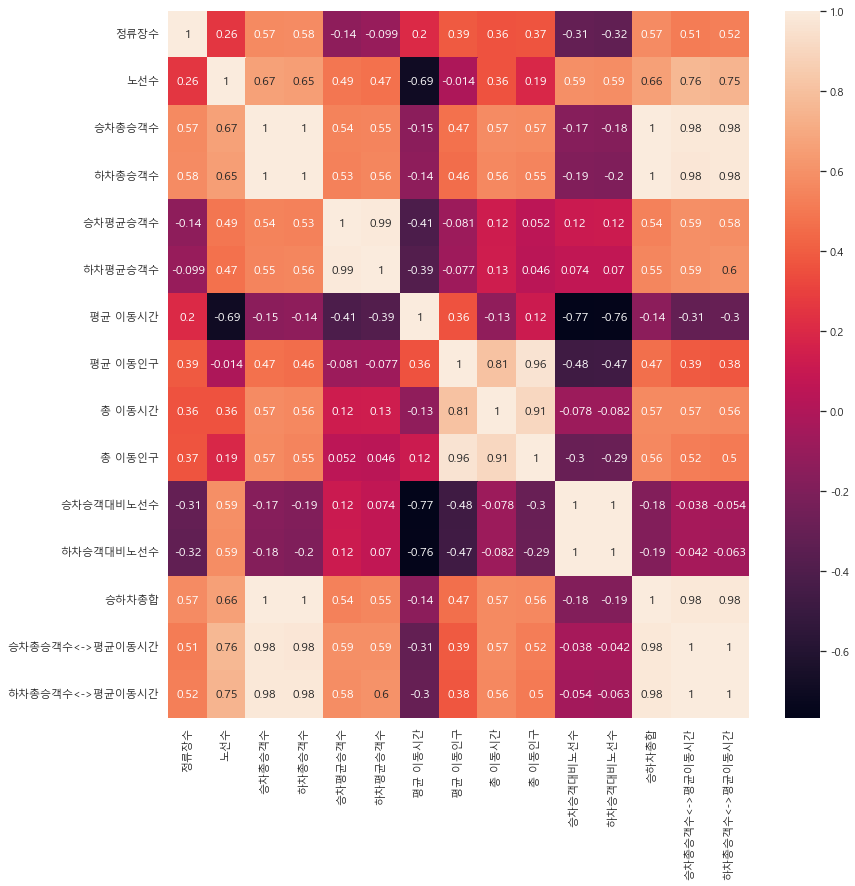

In [54]:
# 히트맵 시각화
plt.figure(figsize = (13, 13))
sns.heatmap(total_on.corr(), annot = True)
plt.show()

#### 솔루션

수요 대비 공급이 적은 곳에 추가 노선 또는 정류장이 필요할 것이다.

## 4.관계 정리

* 가설 1 승차총승객수와 하차총승객수는 노선수와 관련이 있을 것이다. (대립가설 -> 참)
* 가설 2 승하차총합수와 정류장 수는 관련이 있을 것이다. (대립가설 -> 참)
* 가설 3 정류장 수 대비 노선수가 많으면 평균이동시간이 줄어들 것이다 (대립가설 -> 참)
* 가설 4 승하차총승객수 대비 평균 이동시간이 노선 수와 상관 있을 것이다. (대립가설 -> 참)

### 1) 강한 관계의 변수

* 승차총승객수 - 노선수 (양의 상관관계)
* 하차총승객수 - 노선수 (양의 상관관계)
* 정류장 수 대비 노선수 - 평균이동시간 (음의 상관관계)
* 승하차총승객수 대비 평균 이동시간 - 노선수 (양의 상관관계)

### 2) 약한 관계의 변수

* 정류장수 - 노선수
* 총 이동인구 - 노선수
* 총 이동시간 - 노선수
* 기타수단 이동인구 - 정류장수 (아래코드 참고) --> 이동인구의 기준이 이동수단을 탄 사람인지 확실하지 않음. 수단 상관없이 모든 이동인구 기준일 경우에 확인 가능

In [56]:
df['기타수단 이동인구'] = df['총 이동인구'] - df['승하차총합']
spst.pearsonr(df['기타수단 이동인구'], df['정류장수'])

(0.07161315335152926, 0.7337275241766511)

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?

### 가설1 : 승차총승객수와 하차총승객수는 노선수와 관련이 있을 것이다. (대립가설 -> 참)
- 승차총승객수가 많은 지역은 많은 노선수를 갖고 있는 것으로 미루어 보아
- 승차총승객수 대비 노선수가 가장 작은 구에 필요하다고 생각된다.

==> 강동구, 송파구, 강서구

In [60]:
df.sort_values(by='승차승객대비노선수').head(3)

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동시간,평균 이동인구,총 이동시간,총 이동인구,승차승객대비노선수,하차승객대비노선수,승하차총합,기타수단 이동인구
1,강동구,369,21,2890053,2830506,99.16,97.12,25.93,73.49,5082380,14404079.28,7.27,7.42,5720559,8683520.28
17,송파구,415,55,5641742,5603488,114.27,113.50,25.74,94.97,6234190,23004946.79,9.75,9.82,11245230,11759716.79
3,강서구,566,49,4681083,4652828,88.12,87.59,25.52,65.19,5486630,14016047.01,10.47,10.53,9333911,4682136.01


### 가설2 : 승하차총합수와 정류장 수는 관련이 있을 것이다. (대립가설 -> 참)
- 정류장수 대비 승차총합수 칼럽을 추가하여 확인

==> 성동구, 강동구, 강서구

In [63]:
df['정류장수대비 승하차총합'] = df['승하차총합']/df['정류장수']
df.sort_values(by='정류장수대비 승하차총합').head(3)

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동시간,평균 이동인구,총 이동시간,총 이동인구,승차승객대비노선수,하차승객대비노선수,승하차총합,기타수단 이동인구,정류장수대비 승차총합수,정류장수대비 승하차총합
15,성동구,435,58,2807280,2746738,96.38,94.30,22.15,44.75,5139830,10383741.91,20.66,21.12,5554018,4829723.91,12767.86,12767.86
1,강동구,369,21,2890053,2830506,99.16,97.12,25.93,73.49,5082380,14404079.28,7.27,7.42,5720559,8683520.28,15502.87,15502.87
3,강서구,566,49,4681083,4652828,88.12,87.59,25.52,65.19,5486630,14016047.01,10.47,10.53,9333911,4682136.01,16491.01,16491.01


### 가설3 : 정류장 수 대비 노선수가 많으면 평균이동시간이 줄어들 것이다 (대립가설 -> 참)
- 각 자치구들을 노선수/정류장수 컬럼을 기준으로 정렬했을 때,
- 정류장 수 대비 노선 수가 가장 낮은 구에 노선을 설치해야 한다.

=> 강동구, 강서구, 노원구, 중랑구, 도봉구

In [64]:
df['정류장수대비노선수'] = df['노선수']/df['정류장수']
df.sort_values(by="정류장수대비노선수", ascending=True).head(3)

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동시간,평균 이동인구,총 이동시간,총 이동인구,승차승객대비노선수,하차승객대비노선수,승하차총합,기타수단 이동인구,정류장수대비 승차총합수,정류장수대비 승하차총합,정류장수대비노선수
1,강동구,369,21,2890053,2830506,99.16,97.12,25.93,73.49,5082380,14404079.28,7.27,7.42,5720559,8683520.28,15502.87,15502.87,0.06
3,강서구,566,49,4681083,4652828,88.12,87.59,25.52,65.19,5486630,14016047.01,10.47,10.53,9333911,4682136.01,16491.01,16491.01,0.09
8,노원구,514,57,4353295,4292724,88.48,87.25,24.66,59.06,5235480,12538744.48,13.09,13.28,8646019,3892725.48,16821.05,16821.05,0.11


### 가설4 : 승하차총승객수 대비 평균 이동시간이 노선 수와 상관 있을 것이다. (대립가설 -> 참)
#### => 기존 승차 총객수와 상관관계가 유사한 결과, 그러나 기존 노선 평균이동시간간의 -0.69의 상관계수보다 높은 0.74~0.76의 상관계수를 도출
#### 결론)
- 승하차객 대비 평균이동시간이 높은 곳은 수요가 높다고 판단되어 해당 지역에 우선적으로 노선을 투입해야한다.
- 그러므로 승차객대비 평균이동시간 기준 강남구,
 <br>하차객대비 평균이동시간 기준 가장 수요가 높은 관악구에 노선을 증설해야 한다.

In [66]:
total_on.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동시간,평균 이동인구,총 이동시간,총 이동인구,승차승객대비노선수,하차승객대비노선수,승하차총합,승차총승객수<->평균이동시간,하차총승객수<->평균이동시간
0,강남구,499,91,8030483,7569213,128.77,121.37,23.42,104.46,6543820,29188819.52,11.33,12.02,15599696,342907.00,323211.00
4,관악구,466,86,7655819,7792476,154.75,157.52,23.48,53.06,5150450,11638671.68,11.23,11.04,15448295,326046.00,331866.00
14,서초구,600,93,7221330,6977950,126.69,122.42,23.12,72.54,5944440,18651195.64,12.88,13.33,14199280,312345.00,301818.00
16,성북구,602,99,6236424,6231238,123.25,123.15,22.72,48.97,5232500,11278789.10,15.87,15.89,12467662,274534.00,274306.00
19,영등포구,465,101,5739875,5783211,120.34,121.25,21.75,61.76,5525180,15693027.00,17.60,17.46,11523086,263956.00,265948.00


In [67]:
total_out.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동시간,평균 이동인구,총 이동시간,총 이동인구,승차승객대비노선수,하차승객대비노선수,승하차총합,승차총승객수<->평균이동시간,하차총승객수<->평균이동시간
4,관악구,466,86,7655819,7792476,154.75,157.52,23.48,53.06,5150450,11638671.68,11.23,11.04,15448295,326046.00,331866.00
0,강남구,499,91,8030483,7569213,128.77,121.37,23.42,104.46,6543820,29188819.52,11.33,12.02,15599696,342907.00,323211.00
14,서초구,600,93,7221330,6977950,126.69,122.42,23.12,72.54,5944440,18651195.64,12.88,13.33,14199280,312345.00,301818.00
16,성북구,602,99,6236424,6231238,123.25,123.15,22.72,48.97,5232500,11278789.10,15.87,15.89,12467662,274534.00,274306.00
19,영등포구,465,101,5739875,5783211,120.34,121.25,21.75,61.76,5525180,15693027.00,17.60,17.46,11523086,263956.00,265948.00
